In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

Exploratory Data Analysis (EDA):

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/breast_cancer.csv")

In [ ]:
#preview the dataset
print("Dataset Preview:")
print(df.head())

#Diplay basix information
print("\nDataset Overview:\n")
print(df.info())

# Display basic statistics of the dataset
print("\nSummary Statistics:\n")
print(df.describe())

Dataset Preview:
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values (example: using mean for numerical columns)
for column in df.select_dtypes(include=np.number).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

# Fill or drop missing categorical values (example: using mode)
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Missing Values After Handling:
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [34]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

print("\nData after basic cleaning:")
print(df.head())


Data after basic cleaning:
   clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   bland_chromatin  normal_nucleoli  mitoses  class  
0                3                1        1      2  
1                3          

In [42]:
df.dtypes

,0
clump_thickness,int64
uniformity_of_cell_size,int64
uniformity_of_cell_shape,int64
marginal_adhesion,int64
single_epithelial_cell_size,int64
bare_nuclei,int64
bland_chromatin,int64
normal_nucleoli,int64
mitoses,int64
class,int64


In [ ]:
df.var() #using var() function to find the variance

,0
Clump Thickness,7.956694
Uniformity of Cell Size,9.395113
Uniformity of Cell Shape,8.931615
Marginal Adhesion,8.205717
Single Epithelial Cell Size,4.942109
Bare Nuclei,13.277695
Bland Chromatin,6.001013
Normal Nucleoli,9.318772
Mitoses,3.002160
Class,0.911246


In [ ]:
col = df.columns.to_list()
col

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [ ]:
for c in col[:7]:
  print(f"{c} has values {list(df[c].unique())}")


Clump Thickness has values [5.0, 3.0, 6.0, 4.0, 8.0, 1.0, 2.0, 7.0, 10.0, 9.0]
Uniformity of Cell Size has values [1.0, 4.0, 8.0, 10.0, 2.0, 3.0, 7.0, 5.0, 6.0, 9.0]
Uniformity of Cell Shape has values [1.0, 4.0, 8.0, 10.0, 2.0, 3.0, 5.0, 6.0, 7.0, 9.0]
Marginal Adhesion has values [1.0, 5.0, 3.0, 8.0, 10.0, 4.0, 6.0, 2.0, 9.0, 7.0]
Single Epithelial Cell Size has values [2.0, 7.0, 3.0, 1.0, 6.0, 4.0, 5.0, 8.0, 10.0, 9.0]
Bare Nuclei has values [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, 5.0, 8.0, 6.0]
Bland Chromatin has values [3.0, 9.0, 1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 6.0, 10.0]


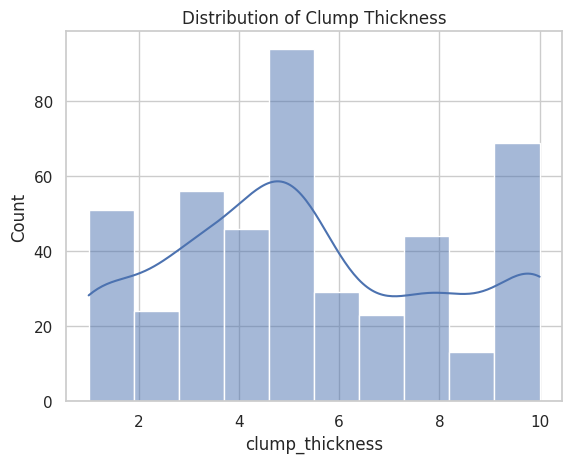

In [36]:
# Distribution of Target Variable
sns.histplot(df["clump_thickness"], bins=10, kde=True)
plt.title("Distribution of Clump Thickness")
plt.show()

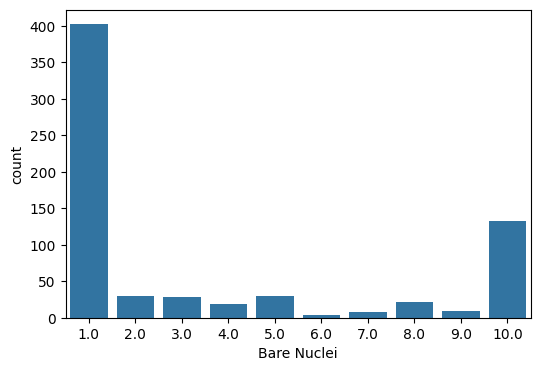

In [ ]:
cnt_dt = df['Bare Nuclei']
plt.figure(figsize=(6, 4))
sns.countplot(x=cnt_dt)
plt.show()

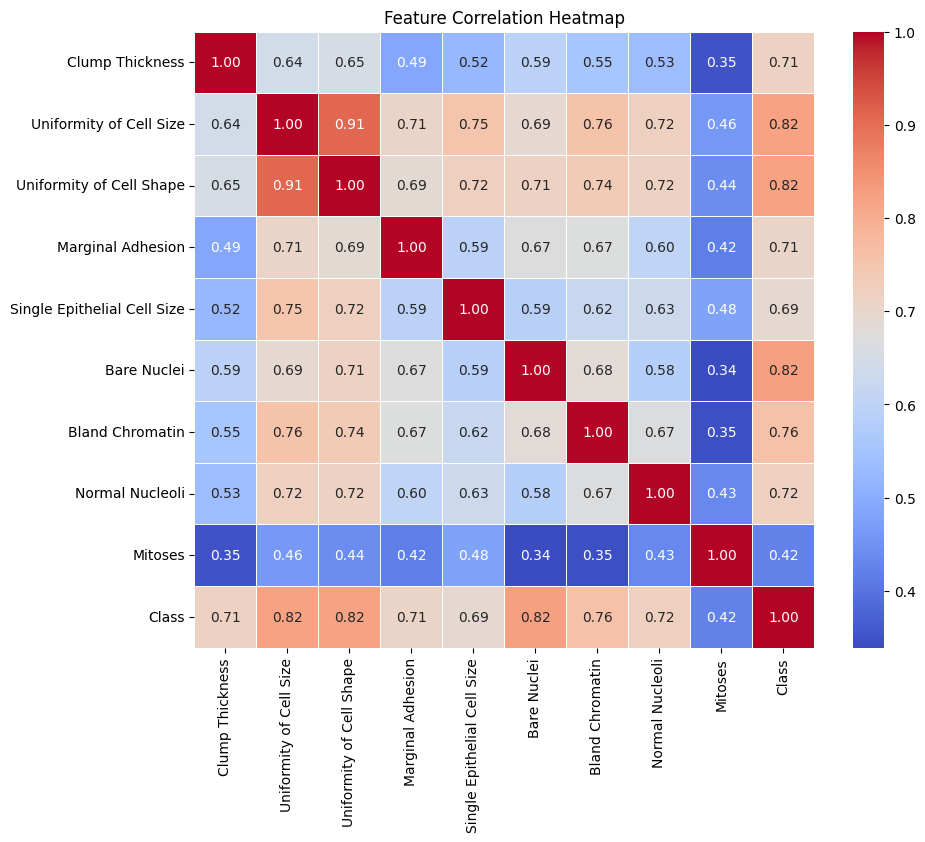

In [ ]:
#create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#Display the Heatmap
plt.title('Feature Correlation Heatmap')
plt.show()

#DataVisualization

In [ ]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1,1,2
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2,1,2
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1,1,2
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7,1,2
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1,1,2
679,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1,1,2
680,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10,2,4
681,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6,1,4


In [45]:
# Define features (X) and target (y)
X = df.drop(columns=["clump_thickness"])
y = df["clump_thickness"]

In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(W)
        # Difference b/w Hypothesis and Actual Y
        loss = Y-Y_pred
        # Gradient Calculation
        dw = - X.T.dot(loss)/m
        # Changing Values of B using Gradient
        W_update = W - alpha *dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost

    return W_update, cost_history

In [48]:
# Scratch-built Linear Regression model using Gradient Descent
class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None

    def fit(self, X, y):
        # Convert X and y to NumPy arrays to ensure correct shape
        X = X.values  # Convert X to a NumPy array
        y = y.values.reshape(-1, 1)  # Convert y to a NumPy array and reshape

        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for _ in range(self.iterations):
            gradients = (1/m) * X.T @ (X @ self.theta - y)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        # Convert X to NumPy array before prediction
        X = X.values  # Convert X to a NumPy array
        return X @ self.theta

In [49]:
# Instantiate the ScratchLinearRegression model
model = ScratchLinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred_scratch = model.predict(X_test)

# Evaluate model
mse = np.mean((y_test.values.reshape(-1, 1) - y_pred_scratch) ** 2)  # Reshape y_test to (137, 1)
r2 = 1 - (np.sum((y_test.values.reshape(-1, 1) - y_pred_scratch) ** 2) / np.sum((y_test.values.reshape(-1, 1) - np.mean(y_test.values.reshape(-1, 1))) ** 2))  # Reshape y_test here as well
print(f'Scratch Model Mean Squared Error: {mse:.4f}')
print(f'Scratch Model R-squared Score: {r2:.4f}')

Scratch Model Mean Squared Error: 5.2162
Scratch Model R-squared Score: 0.2834


In [52]:
X = df.drop('clump_thickness', axis=1)
y = df['clump_thickness']

In [53]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Normalize features (important for models like Linear Regression & Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Initialize the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

In [61]:
# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [64]:
# Calculate MAE, RMSE, and R-squared for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate MAE, RMSE, and R-squared for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Evaluation Metrics for Both Models
print("Linear Regression Model Evaluation:")
print(f"MAE: {mae_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R-squared: {r2_linear}")

print("\nRandom Forest Regressor Evaluation:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Linear Regression Model Evaluation:
MAE: 1.854444196353685
RMSE: 2.2854172679858693
R-squared: 0.28245162193068707

Random Forest Regressor Evaluation:
MAE: 1.8897918831168832
RMSE: 2.316762820365769
R-squared: 0.26263362691921566


In [65]:
# For Linear Regression
# Using valid parameters for newer scikit-learn versions
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Constraint coefficients to be positive
}

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

print("\nBest Linear Regression Parameters:")
print(lr_grid.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-lr_grid.best_score_))


Best Linear Regression Parameters:
{'fit_intercept': True, 'positive': True}
Best Cross-Validation Score: 2.084688200815645


In [66]:
rf_params = {
    'n_estimators': [30, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=10,  # Try only 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)

print("\nBest Random Forest Parameters:")
print(rf_random.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-rf_random.best_score_))


Best Random Forest Parameters:
{'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best Cross-Validation Score: 2.1595644223762607


In [67]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns =X.columns)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame to view the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(importances_df)

# Select the top features (say, top 5 important features)
top_features_rf = importances_df['Feature'].head().values


Feature Importances from Random Forest:
                       Feature  Importance
8                        class    0.486103
1     uniformity_of_cell_shape    0.077326
2            marginal_adhesion    0.076601
5              bland_chromatin    0.071397
0      uniformity_of_cell_size    0.069859
3  single_epithelial_cell_size    0.067612
6              normal_nucleoli    0.058355
4                  bare_nuclei    0.050873
7                      mitoses    0.041874


In [68]:
# Best hyperparameters from the grid search
best_lr_params = lr_grid.best_params_

# Initialize Linear Regression with the best parameters
lr_final = LinearRegression(
    fit_intercept=best_lr_params['fit_intercept'],
    positive=best_lr_params['positive']
  )

# Initialize RFE with the Linear Regression model and the number of features to select
rfe_lr = RFE(lr_final, n_features_to_select=5)  # Select top 5 features
rfe_lr.fit(X_train, y_train)

# Get selected features
selected_features_lr = X_train.columns[rfe_lr.support_]
print("Selected Features for Linear Regression:")
print(selected_features_lr)

# Create a new feature set based on the selected features
X_train_selected_lr = X_train[selected_features_lr]
X_test_selected_lr = X_test[selected_features_lr]

Selected Features for Linear Regression:
Index(['uniformity_of_cell_size', 'uniformity_of_cell_shape', 'bare_nuclei',
       'mitoses', 'class'],
      dtype='object')


In [69]:
# Create a new feature set based on the top features
X_train_selected_rf = X_train[top_features_rf]
X_test_selected_rf = X_test[top_features_rf]

# Re-train the model using only the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected_rf, y_train)

# Predictions
y_pred_rf_selected = rf_model_selected.predict(X_test_selected_rf)

# Evaluate Model Performance
rmse_rf_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))
print(f"RMSE for Model with Selected Features (Random Forest): {rmse_rf_selected}")

RMSE for Model with Selected Features (Random Forest): 2.5068419659191323


In [70]:
# Re-train the Linear Regression model using only the selected features
lr_final_selected = LinearRegression(fit_intercept=best_lr_params['fit_intercept'],
                                     positive=best_lr_params['positive'])
lr_final_selected.fit(X_train_selected_lr, y_train)

# Predictions
y_pred_lr_selected = lr_final_selected.predict(X_test_selected_lr)

# Evaluate Model Performance
rmse_lr_selected = np.sqrt(mean_squared_error(y_test, y_pred_lr_selected))
print(f"RMSE for Model with Selected Features (Linear Regression): {rmse_lr_selected}")

RMSE for Model with Selected Features (Linear Regression): 2.3021411200907593
